# Load data

In [1]:
import pandas as pd
import numpy as np

# Path file dataset
PATH_IMPACTS = r"D:\KULIAH UNNES\Komputasi Statistika\Possible Asteroid Impacts with Earth\archive\impacts.csv"
PATH_ORBITS  = r"D:\KULIAH UNNES\Komputasi Statistika\Possible Asteroid Impacts with Earth\archive\orbits.csv"

impacts = pd.read_csv(PATH_IMPACTS)
orbits  = pd.read_csv(PATH_ORBITS)

print(f"impacts.csv shape : {impacts.shape}")
print(f"orbits.csv shape  : {orbits.shape}\n")

impacts.csv shape : (683, 11)
orbits.csv shape  : (15635, 15)



Standardisasi Nama Kolom Key

In [2]:
# Standardisasi Nama Kolom Key

# Fungsi untuk membangun key objek yang konsisten di kedua dataset
def build_obj_key(s: str) -> str:
    s = str(s)
    # ubah non-breaking space jadi spasi biasa
    s = s.replace("\xa0", " ")
    # buang spasi di awal/akhir
    s = s.strip()
    
    # kalau ada tanda kurung, ambil yang di dalam kurung
    # contoh: "230089 (2000 WP148)" -> "2000 WP148"
    if "(" in s and ")" in s:
        start = s.find("(") + 1
        end   = s.find(")", start)
        s = s[start:end]
    
    # jaga-jaga kalau masih ada kurung
    s = s.replace("(", "").replace(")", "")
    
    # rapikan spasi berlebih -> satu spasi saja
    s = " ".join(s.split())
    
    return s

# Pastikan kolom "Object Name" ada
if "Object Name" in impacts.columns and "Object Name" in orbits.columns:
    impacts["obj_key"] = impacts["Object Name"].map(build_obj_key)
    orbits["obj_key"]  = orbits["Object Name"].map(build_obj_key)
else:
    raise ValueError("Kolom 'Object Name' tidak ditemukan di salah satu dataset.")


Merge Dataset

In [3]:
# Merge Dataset pakai key baru

df = impacts.merge(
    orbits.drop(columns=["Object Name"]),  # hindari duplikasi kolom nama
    on="obj_key",
    how="left",
    suffixes=("_imp", "_orb")
)

print("=== MERGE Completed ===")
print("Merged DataFrame shape:", df.shape)

missing_after_merge = df.isna().sum().sum()
print("Total Missing Values After Merge:", missing_after_merge)

# (opsional) lihat missing per kolom
print("\nMissing per column:")
print(df.isna().sum())


=== MERGE Completed ===
Merged DataFrame shape: (683, 26)
Total Missing Values After Merge: 43

Missing per column:
Object Name                                 0
Period Start                                0
Period End                                  0
Possible Impacts                            0
Cumulative Impact Probability               0
Asteroid Velocity                           0
Asteroid Magnitude_imp                      0
Asteroid Diameter (km)                      0
Cumulative Palermo Scale                    0
Maximum Palermo Scale                       0
Maximum Torino Scale                        0
obj_key                                     0
Object Classification                       3
Epoch (TDB)                                 3
Orbit Axis (AU)                             3
Orbit Eccentricity                          3
Orbit Inclination (deg)                     3
Perihelion Argument (deg)                   3
Node Longitude (deg)                        3
Mean Anomo

In [4]:
df_clean = df.dropna().reset_index(drop=True)
print(df_clean.shape)

(679, 26)


Validasi Duplikat

In [5]:
dups = df["Object Name"].duplicated().sum()
print("Duplicated Object Names:", dups)


Duplicated Object Names: 0


Dataset Info

In [6]:
print("\n=== INFO (Merged Data) ===")
df.info()


=== INFO (Merged Data) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Object Name                               683 non-null    object 
 1   Period Start                              683 non-null    int64  
 2   Period End                                683 non-null    int64  
 3   Possible Impacts                          683 non-null    int64  
 4   Cumulative Impact Probability             683 non-null    float64
 5   Asteroid Velocity                         683 non-null    float64
 6   Asteroid Magnitude_imp                    683 non-null    float64
 7   Asteroid Diameter (km)                    683 non-null    float64
 8   Cumulative Palermo Scale                  683 non-null    float64
 9   Maximum Palermo Scale                     683 non-null    float64
 10  Maximum To

Missing Value per Kolom

In [7]:
print("\n=== Missing Values per Column ===")
print(df.isna().sum())


=== Missing Values per Column ===
Object Name                                 0
Period Start                                0
Period End                                  0
Possible Impacts                            0
Cumulative Impact Probability               0
Asteroid Velocity                           0
Asteroid Magnitude_imp                      0
Asteroid Diameter (km)                      0
Cumulative Palermo Scale                    0
Maximum Palermo Scale                       0
Maximum Torino Scale                        0
obj_key                                     0
Object Classification                       3
Epoch (TDB)                                 3
Orbit Axis (AU)                             3
Orbit Eccentricity                          3
Orbit Inclination (deg)                     3
Perihelion Argument (deg)                   3
Node Longitude (deg)                        3
Mean Anomoly (deg)                          3
Perihelion Distance (AU)                    3

Tampilan Kolom Penting 

In [8]:
important_cols = [
    "Object Name",
    "Cumulative Impact Probability",
    "Possible Impacts",
    "Asteroid Velocity",
    "Asteroid Magnitude",
    "Asteroid Diameter (km)",
    "Impact Energy (Mt)",
    "Orbit Eccentricity",
    "Orbit Inclination (deg)",
    "Orbit Axis (AU)",
    "Minimum Orbit Intersection Distance (AU)"
]

available = [c for c in important_cols if c in df.columns]

print("\n=== Kolom yang akan digunakan ===")
for c in available:
    print("", c)


=== Kolom yang akan digunakan ===
 Object Name
 Cumulative Impact Probability
 Possible Impacts
 Asteroid Velocity
 Asteroid Diameter (km)
 Orbit Eccentricity
 Orbit Inclination (deg)
 Orbit Axis (AU)
 Minimum Orbit Intersection Distance (AU)


# Pahami struktur & cek kualitas data

Merge Diagnostics

In [9]:
# ==========================================================
# ADVANCED MERGE DIAGNOSTICS — Revised (no seaborn)
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("=== MERGE DIAGNOSTICS ===\n")

# -------------------------------------------
# 1) Tampilkan struktur orbits.csv
# -------------------------------------------

print("Kolom di orbits.csv:")
print(orbits.columns.tolist())

print("\n5 baris pertama orbits.csv:")
display(orbits.head())

# -------------------------------------------
# 2) Cek apakah ada kolom kandidat nama asteroid
# -------------------------------------------

possible_keys = [
    "Object Name", "Object", "fullname", "Full Name",
    "Designation", "Asteroid", "Asteroid Name",
    "Neo", "name", "full_name"
]

found_keys = [c for c in possible_keys if c in orbits.columns]

if len(found_keys) == 0:
    print("\nTidak ditemukan kolom nama objek yang cocok di orbits.csv.")
    print("Merge dengan impacts.csv pasti gagal karena tidak ada key yang sesuai.")
else:
    print("\nKolom kandidat untuk merge ditemukan:", found_keys)


=== MERGE DIAGNOSTICS ===

Kolom di orbits.csv:
['Object Name', 'Object Classification', 'Epoch (TDB)', 'Orbit Axis (AU)', 'Orbit Eccentricity', 'Orbit Inclination (deg)', 'Perihelion Argument (deg)', 'Node Longitude (deg)', 'Mean Anomoly (deg)', 'Perihelion Distance (AU)', 'Aphelion Distance (AU)', 'Orbital Period (yr)', 'Minimum Orbit Intersection Distance (AU)', 'Orbital Reference', 'Asteroid Magnitude', 'obj_key']

5 baris pertama orbits.csv:


,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,obj_key
0,433 Eros,Amor Asteroid,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,433 Eros
1,719 Albert,Amor Asteroid,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,719 Albert
2,887 Alinda,Amor Asteroid,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,887 Alinda
3,1036 Ganymed,Amor Asteroid,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,1036 Ganymed
4,1221 Amor,Amor Asteroid,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,1221 Amor



Kolom kandidat untuk merge ditemukan: ['Object Name']


List Kolom Merged DF

In [10]:
print("\n=== LIST KOLOM df ===")
print(df.columns.tolist())
print("Total kolom:", len(df.columns))




=== LIST KOLOM df ===
['Object Name', 'Period Start', 'Period End', 'Possible Impacts', 'Cumulative Impact Probability', 'Asteroid Velocity', 'Asteroid Magnitude_imp', 'Asteroid Diameter (km)', 'Cumulative Palermo Scale', 'Maximum Palermo Scale', 'Maximum Torino Scale', 'obj_key', 'Object Classification', 'Epoch (TDB)', 'Orbit Axis (AU)', 'Orbit Eccentricity', 'Orbit Inclination (deg)', 'Perihelion Argument (deg)', 'Node Longitude (deg)', 'Mean Anomoly (deg)', 'Perihelion Distance (AU)', 'Aphelion Distance (AU)', 'Orbital Period (yr)', 'Minimum Orbit Intersection Distance (AU)', 'Orbital Reference', 'Asteroid Magnitude_orb']
Total kolom: 26


Missing Value Check

In [11]:
print("\n=== MISSING VALUES (df) ===")
missing = df.isna().sum().sort_values(ascending=False)
display(missing)

# daftar kolom orbit
orbit_cols = [
    "Orbit Axis (AU)", 
    "Orbit Eccentricity", 
    "Orbit Inclination (deg)",
    "Minimum Orbit Intersection Distance (AU)", 
    "Perihelion Distance (AU)",
    "Aphelion Distance (AU)", 
    "Orbital Period (yr)"
]

# cek apakah kolom orbit semuanya NaN
all_orbit_nan = all(
    df[c].isna().sum() == len(df) 
    for c in orbit_cols 
    if c in df.columns
)

if all_orbit_nan:
    print("\nWARNING: Semua fitur orbit = NaN → MERGE GAGAL 100 PERSEN.")
    print("SEBELUM modeling, merge harus diperbaiki.\n")



=== MISSING VALUES (df) ===


Asteroid Magnitude_orb                      4
Orbital Period (yr)                         3
Orbit Axis (AU)                             3
Node Longitude (deg)                        3
Perihelion Argument (deg)                   3
Orbit Inclination (deg)                     3
Object Classification                       3
Orbit Eccentricity                          3
Epoch (TDB)                                 3
Aphelion Distance (AU)                      3
Minimum Orbit Intersection Distance (AU)    3
Orbital Reference                           3
Perihelion Distance (AU)                    3
Mean Anomoly (deg)                          3
Maximum Palermo Scale                       0
Cumulative Palermo Scale                    0
Possible Impacts                            0
Period End                                  0
Period Start                                0
Object Name                                 0
Asteroid Diameter (km)                      0
Asteroid Magnitude_imp            

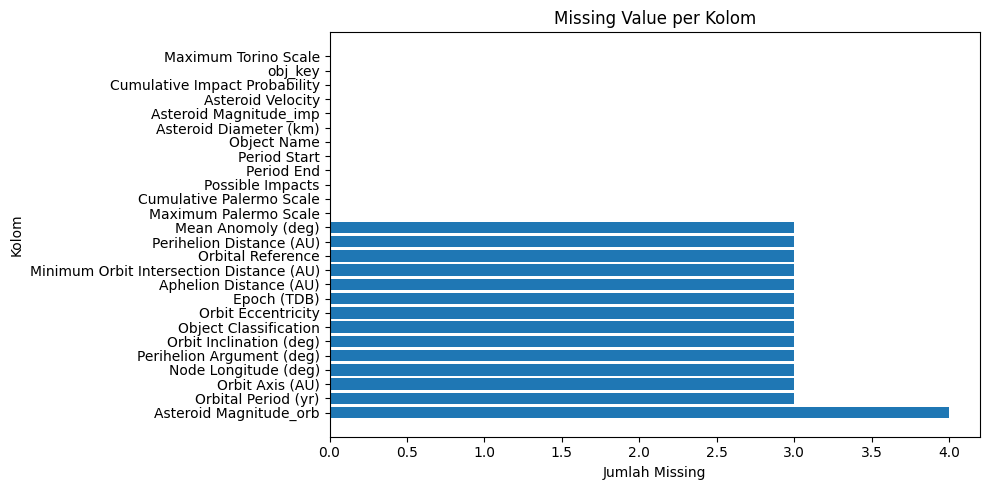

In [12]:
# Visualisasi missing values 
plt.figure(figsize=(10, 5))
plt.barh(missing.index, missing.values)
plt.title("Missing Value per Kolom")
plt.xlabel("Jumlah Missing")
plt.ylabel("Kolom")
plt.tight_layout()
plt.show()


Descriptive Statistics

In [13]:

print("\n=== DESCRIPTIVE STATISTICS (NUMERIK) ===")
display(df.describe().T)


=== DESCRIPTIVE STATISTICS (NUMERIK) ===


,count,mean,std,min,25%,50%,75%,max
Period Start,683.0,2062.573939,43.501694,2.017000e+03,2.034000e+03,2061.000000,2085.000000,2880.0000
Period End,683.0,2099.680820,37.594698,2.017000e+03,2.090000e+03,2109.000000,2114.000000,2880.0000
Possible Impacts,683.0,43.348463,113.773280,1.000000e+00,2.000000e+00,6.000000,29.000000,1144.0000
Cumulative Impact Probability,683.0,0.000154,0.002520,1.100000e-10,1.100000e-07,0.000002,0.000016,0.0650
Asteroid Velocity,683.0,11.462577,6.067772,3.400000e-01,7.240000e+00,10.500000,14.810000,39.4700
Asteroid Magnitude_imp,683.0,26.158272,2.388296,1.560000e+01,2.500000e+01,26.400000,27.800000,31.6000
Asteroid Diameter (km),683.0,0.049378,0.156403,2.000000e-03,1.000000e-02,0.017000,0.033000,2.5790
Cumulative Palermo Scale,683.0,-6.511552,1.509189,-1.098000e+01,-7.490000e+00,-6.460000,-5.490000,-1.4200
Maximum Palermo Scale,683.0,-6.804012,1.476135,-1.100000e+01,-7.790000e+00,-6.790000,-5.865000,-1.4200
Epoch (TDB),680.0,56703.369118,1709.491047,4.422100e+04,5.563150e+04,57800.000000,57800.000000,57800.0000


Distribusi Fitur Utama

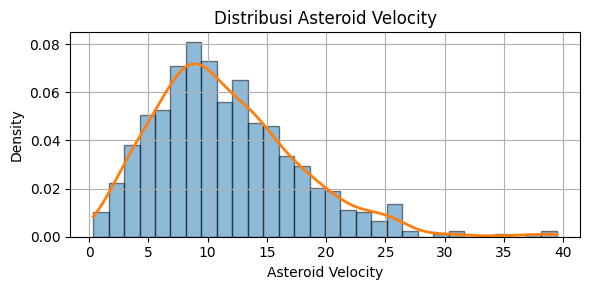

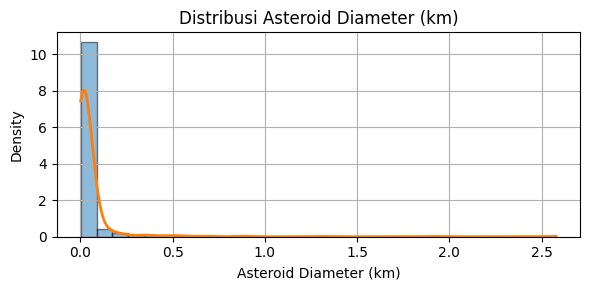

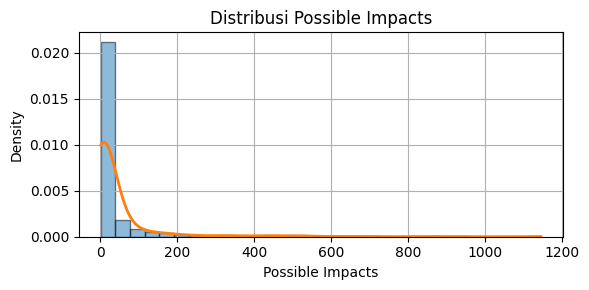

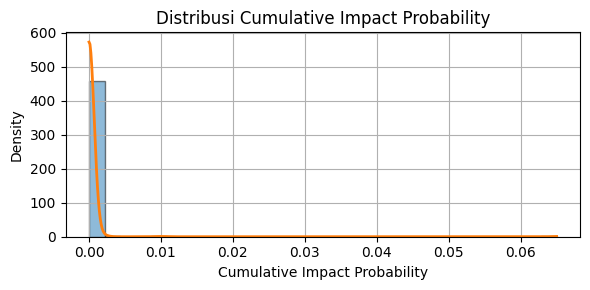

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

main_features = [
    "Asteroid Velocity",
    "Asteroid Magnitude_x",
    "Asteroid Diameter (km)",
    "Impact Energy (Mt)",
    "Possible Impacts",
    "Cumulative Impact Probability"
]

available = [c for c in main_features if c in df.columns]

for col in available:
    data = df[col].dropna()

    plt.figure(figsize=(6,3))
    plt.hist(data, bins=30, density=True, alpha=0.5, edgecolor='black')

    # KDE
    kde = gaussian_kde(data)
    x_vals = np.linspace(data.min(), data.max(), 500)
    plt.plot(x_vals, kde(x_vals), linewidth=2)

    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Distribusi Log Probability 

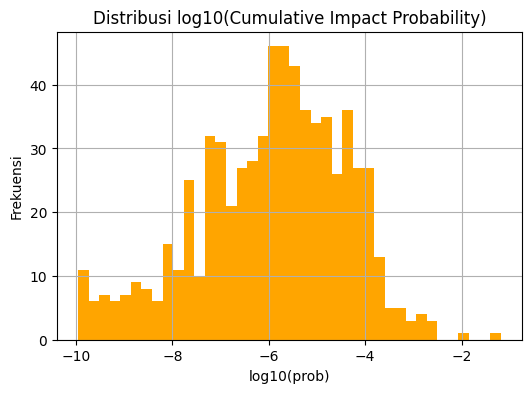

In [15]:
if "Cumulative Impact Probability" in df.columns:
    cip = df["Cumulative Impact Probability"].replace(0,np.nan)

    plt.figure(figsize=(6,4))
    plt.hist(np.log10(cip.dropna()), bins=40, color='orange')
    plt.title("Distribusi log10(Cumulative Impact Probability)")
    plt.xlabel("log10(prob)")
    plt.ylabel("Frekuensi")
    plt.grid(True)
    plt.show()



Heatmap Korelasi 

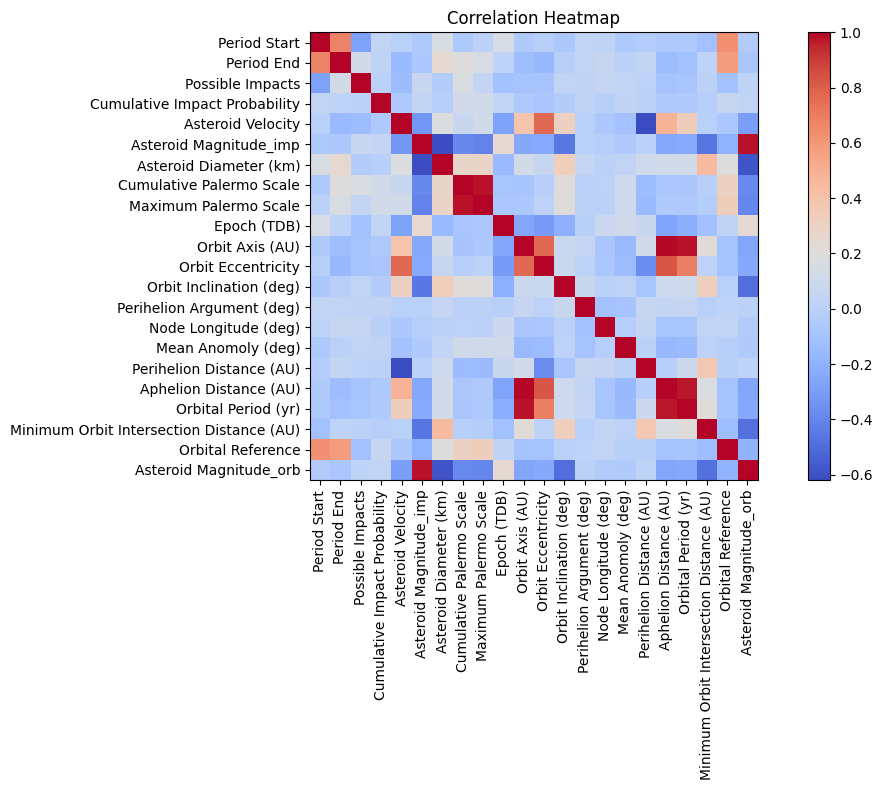

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# pilih kolom numerik
numeric_df = df.select_dtypes(include=[np.number]).dropna(axis=1, how='all')

# hitung korelasi
corr = numeric_df.corr()

# plot heatmap
plt.figure(figsize=(12,8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

# label sumbu
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

Range Fitur Orbit

In [17]:
print("\n=== RANGE ORBIT FEATURES ===")
for col in orbit_cols:
    if col in df.columns:
        if df[col].notna().sum() > 0:
            print(f"{col:40s}  → {df[col].min()}  to  {df[col].max()}")
        else:
            print(f"{col:40s}  → All NaN (merge gagal)")


=== RANGE ORBIT FEATURES ===
Orbit Axis (AU)                           → 0.6923  to  8.0812
Orbit Eccentricity                        → 0.021  to  0.9654
Orbit Inclination (deg)                   → 0.0147  to  58.4706
Minimum Orbit Intersection Distance (AU)  → 0.0  to  0.3152
Perihelion Distance (AU)                  → 0.0791  to  1.2977
Aphelion Distance (AU)                    → 0.96  to  15.59
Orbital Period (yr)                       → 0.58  to  22.97


# Preprosesing Data

Normalisasi Nama Objek & Merge

In [18]:
def normalize_name(s: str) -> str:
    s = str(s).replace("\xa0", " ").strip()
    
    # Ambil isi dalam kurung
    if "(" in s and ")" in s:
        s = s[s.find("(")+1 : s.find(")")]
    
    # Bersihkan kurung dan spasi ganda
    s = s.replace("(", "").replace(")", "")
    s = " ".join(s.split())
    return s

impacts["obj_key"] = impacts["Object Name"].map(normalize_name)
orbits["obj_key"]  = orbits["Object Name"].map(normalize_name)

df = impacts.merge(
    orbits.drop(columns=["Object Name"]),
    on="obj_key",
    how="left",
    suffixes=("_imp", "_orb")
)

print("Merge success:", df.shape)


Merge success: (683, 26)


DROP LEAKAGE FEATURES

In [19]:
leak_cols = [
    "Cumulative Impact Probability", 
    "Cumulative Palermo Scale", 
    "Maximum Palermo Scale",
    "Maximum Torino Scale"
]

df = df.drop(columns=leak_cols)


HANDLE MISSING

In [20]:
orbit_cols = [
    "Orbit Axis (AU)", "Orbit Eccentricity", "Orbit Inclination (deg)",
    "Minimum Orbit Intersection Distance (AU)",
    "Perihelion Distance (AU)", "Aphelion Distance (AU)",
    "Orbital Period (yr)"
]

df = df.dropna(subset=orbit_cols)


# FEATURE ENGINEERING

LOG TRANSFORMATION

In [21]:
import numpy as np

# 1. log_diameter
df["log_diameter"] = np.log1p(df["Asteroid Diameter (km)"])

# 2. log_velocity
df["log_velocity"] = np.log1p(df["Asteroid Velocity"])

# 3. log_impacts
df["log_impacts"] = np.log1p(df["Possible Impacts"])

# 4. Impact Energy (jika belum ada → buat)
if "Impact Energy (Mt)" not in df.columns:
    df["Impact Energy (Mt)"] = (
        df["Asteroid Diameter (km)"] ** 3 * (df["Asteroid Velocity"] ** 2)
    )

# 5. log_energy
df["log_energy"] = np.log1p(df["Impact Energy (Mt)"])

print("Log transformation selesai.")

Log transformation selesai.


Interaction Features

In [22]:
import numpy as np

# 1. Diameter × Velocity
df["diameter_x_velocity"] = df["Asteroid Diameter (km)"] * df["Asteroid Velocity"]

# 2. Diameter × Possible Impacts
df["diameter_x_impacts"] = df["Asteroid Diameter (km)"] * df["Possible Impacts"]

# 3. Velocity × Possible Impacts
df["velocity_x_impacts"] = df["Asteroid Velocity"] * df["Possible Impacts"]

# 4. Velocity × MOID
df["velocity_x_MOID"] = df["Asteroid Velocity"] * df["Minimum Orbit Intersection Distance (AU)"]

# 5. Diameter × MOID
df["diameter_x_MOID"] = df["Asteroid Diameter (km)"] * df["Minimum Orbit Intersection Distance (AU)"]

# 6. Energi × MOID  (menggabungkan fisika energi + dinamika orbit)
if "Impact Energy (Mt)" not in df.columns:
    df["Impact Energy (Mt)"] = (
        df["Asteroid Diameter (km)"]**3 * (df["Asteroid Velocity"]**2)
    )

df["energy_x_MOID"] = df["Impact Energy (Mt)"] * df["Minimum Orbit Intersection Distance (AU)"]

print("Interaction features selesai dibuat.")

Interaction features selesai dibuat.


Polynomial Features (degree 2)

In [23]:
# Orbit eccentricity squared
df["ecc2"] = df["Orbit Eccentricity"] ** 2

# Inclination squared
df["incl2"] = df["Orbit Inclination (deg)"] ** 2

# Orbit axis squared 
df["axis2"] = df["Orbit Axis (AU)"] ** 2

# Velocity squared
df["velocity2"] = df["Asteroid Velocity"] ** 2

# Diameter squared
df["diameter2"] = df["Asteroid Diameter (km)"] ** 2

# MOID squared
df["moid2"] = df["Minimum Orbit Intersection Distance (AU)"] ** 2

print("Polynomial features (degree 2) selesai dibuat.")

Polynomial features (degree 2) selesai dibuat.


Orbit Dynamics Features

In [24]:
import numpy as np

# 1. Perihelion / Aphelion ratio
#    Menunjukkan seberapa elips orbit tersebut.
df["peri_to_aphe_ratio"] = (
    df["Perihelion Distance (AU)"] / df["Aphelion Distance (AU)"]
)

# 2. Sin dari inclination (lebih stabil untuk ML)
df["incl_sin"] = np.sin(np.deg2rad(df["Orbit Inclination (deg)"]))

# 3. Cos dari inclination (komplementer)
df["incl_cos"] = np.cos(np.deg2rad(df["Orbit Inclination (deg)"]))

# 4. Normalized perihelion distance
#    Menangkap pola jarak terdekat ke Matahari dalam skala orbital.
df["peri_norm"] = (
    df["Perihelion Distance (AU)"] / df["Orbit Axis (AU)"]
)

# 5. Normalized aphelion distance
df["aphe_norm"] = (
    df["Aphelion Distance (AU)"] / df["Orbit Axis (AU)"]
)

print("Orbit dynamics features selesai dibuat.")

Orbit dynamics features selesai dibuat.


# PEMILIHAN FITUR UNTUK MODEL

Daftar Fitur Final untuk Logistic Regression

In [25]:
feature_list = [

    # Log-transformed features
    "log_diameter",
    "log_velocity",
    "log_impacts",
    "log_energy",

    # Orbit features (inti)
    "Orbit Axis (AU)",
    "Orbit Eccentricity",
    "Orbit Inclination (deg)",
    "Minimum Orbit Intersection Distance (AU)",
    "Perihelion Distance (AU)",
    "Aphelion Distance (AU)",
    "Orbital Period (yr)",

    # Interaction features
    "diameter_x_velocity",
    "diameter_x_impacts",
    "velocity_x_impacts",
    "velocity_x_MOID",
    "diameter_x_MOID",
    "energy_x_MOID",

    # Polynomial features
    "ecc2",
    "incl2",
    "axis2",
    "velocity2",
    "diameter2",
    "moid2",

    # Orbit dynamics features
    "peri_to_aphe_ratio",
    "incl_sin",
    "incl_cos",
    "peri_norm",
    "aphe_norm"
]


Pastikan hanya fitur yang benar-benar ada di df

In [26]:
available_features = [f for f in feature_list if f in df.columns]

print("Fitur akhir yang digunakan untuk X:")
for f in available_features:
    print("-", f)

Fitur akhir yang digunakan untuk X:
- log_diameter
- log_velocity
- log_impacts
- log_energy
- Orbit Axis (AU)
- Orbit Eccentricity
- Orbit Inclination (deg)
- Minimum Orbit Intersection Distance (AU)
- Perihelion Distance (AU)
- Aphelion Distance (AU)
- Orbital Period (yr)
- diameter_x_velocity
- diameter_x_impacts
- velocity_x_impacts
- velocity_x_MOID
- diameter_x_MOID
- energy_x_MOID
- ecc2
- incl2
- axis2
- velocity2
- diameter2
- moid2
- peri_to_aphe_ratio
- incl_sin
- incl_cos
- peri_norm
- aphe_norm


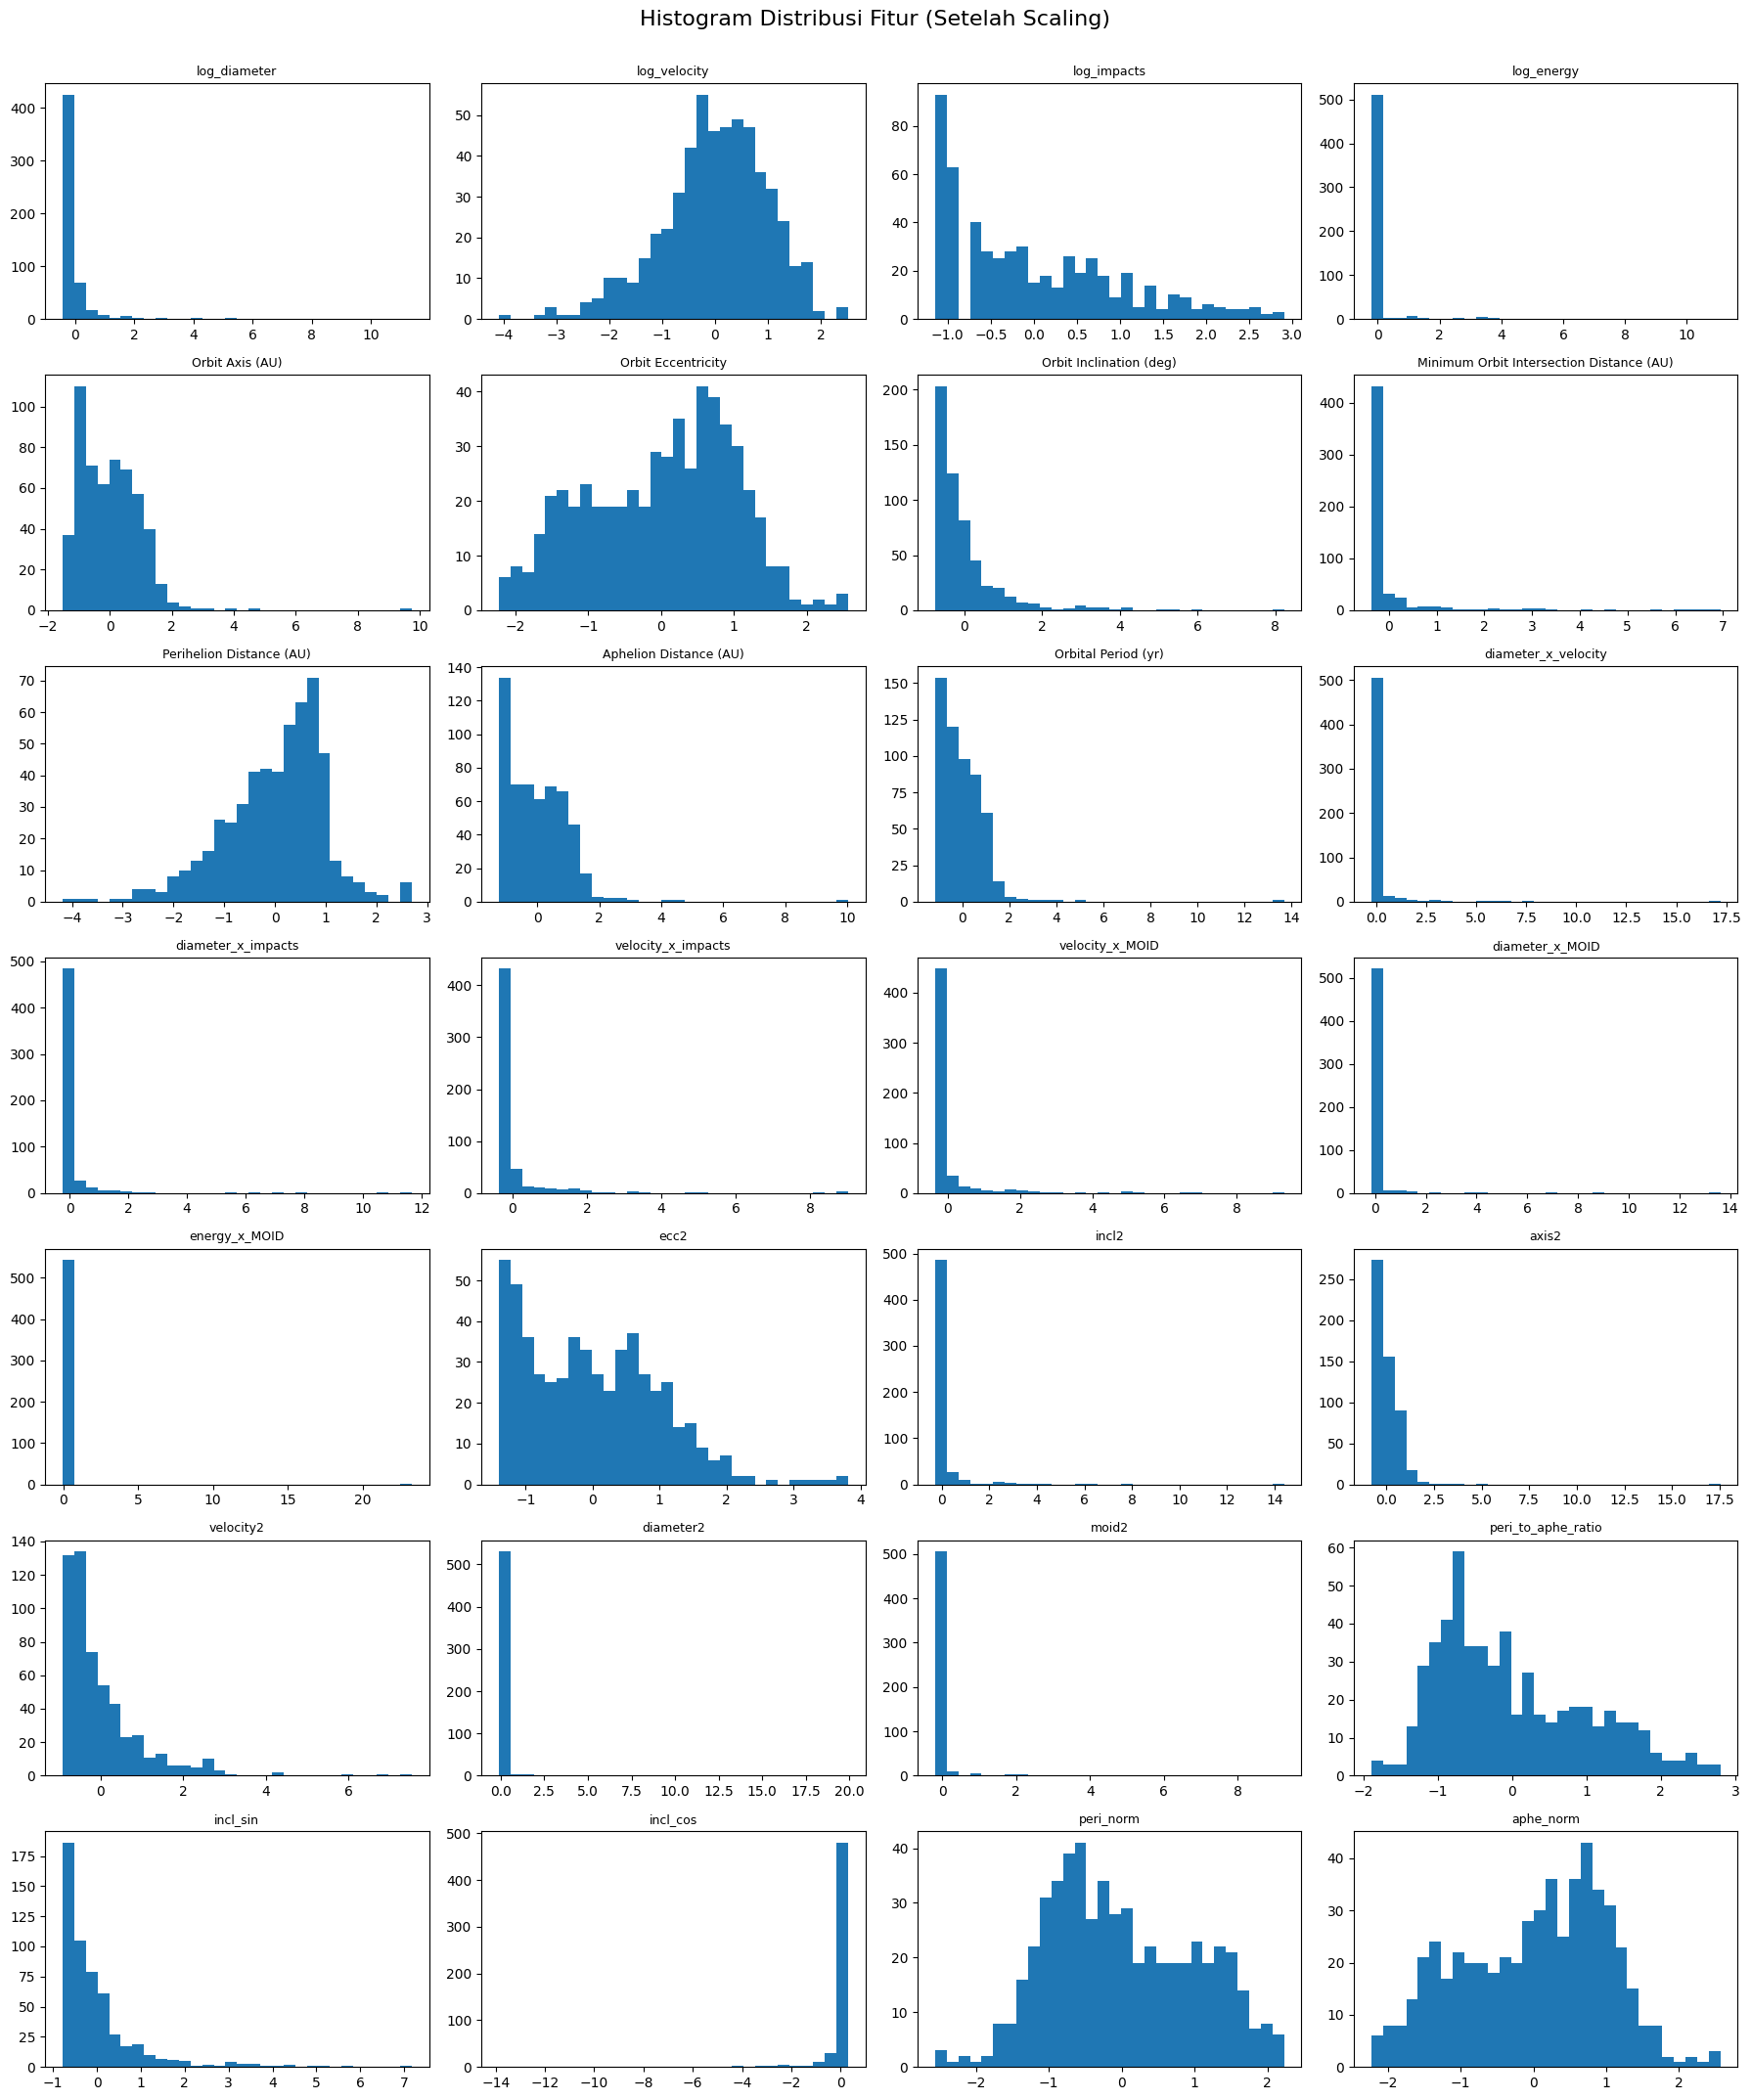

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# gunakan X_train_scaled atau X_train_final (jika setelah imbalance)
data = pd.DataFrame(X_train_scaled, columns=available_features)

# jumlah fitur
num_features = len(available_features)

# menentukan ukuran grid otomatis
cols = 4
rows = int(np.ceil(num_features / cols))

plt.figure(figsize=(18, rows * 3))

for idx, f in enumerate(available_features):
    plt.subplot(rows, cols, idx + 1)
    plt.hist(data[f], bins=30)
    plt.title(f, fontsize=9)
    plt.tight_layout()

plt.suptitle("Histogram Distribusi Fitur (Setelah Scaling)", fontsize=16, y=1.02)
plt.show()


BUAT ULANG TARGET HighRisk

In [27]:
df["HighRisk"] = (
    (df["Possible Impacts"] >= 10) |
    ((df["Asteroid Diameter (km)"] >= 0.05) &
     (df["Minimum Orbit Intersection Distance (AU)"] < 0.01)) |
    ((df["Impact Energy (Mt)"] > df["Impact Energy (Mt)"].median()) &
     (df["Asteroid Velocity"] > df["Asteroid Velocity"].median()))
).astype(int)

print("Distribusi HighRisk:")
print(df["HighRisk"].value_counts())

Distribusi HighRisk:
HighRisk
1    453
0    227
Name: count, dtype: int64


Susun X dan y

In [28]:
X = df[available_features].copy()
y = df["HighRisk"].astype(int)

print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (680, 28)
Shape y: (680,)


Validasi

In [29]:
print("Total missing dalam X:", X.isna().sum().sum())
print("\nDistribusi y:")
print(y.value_counts())

Total missing dalam X: 0

Distribusi y:
HighRisk
1    453
0    227
Name: count, dtype: int64


# Train–Test Split

In [30]:
from sklearn.model_selection import train_test_split

# Stratify penting karena menjaga distribusi kelas sama di train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,          # 20% untuk test
    random_state=42,         # reproducible
    stratify=y               # jaga distribusi kelas
)

print("=== Split Completed ===")
print("Train size :", X_train.shape[0])
print("Test size  :", X_test.shape[0])

print("\nDistribusi kelas di TRAIN:")
print(y_train.value_counts())

print("\nDistribusi kelas di TEST:")
print(y_test.value_counts())

=== Split Completed ===
Train size : 544
Test size  : 136

Distribusi kelas di TRAIN:
HighRisk
1    362
0    182
Name: count, dtype: int64

Distribusi kelas di TEST:
HighRisk
1    91
0    45
Name: count, dtype: int64


# SCALING

In [31]:
from sklearn.preprocessing import StandardScaler

# buat scaler
scaler = StandardScaler()

# fit scaler pada data training
X_train_scaled = scaler.fit_transform(X_train)

# transform data testing memakai scaler yang sama
X_test_scaled  = scaler.transform(X_test)

print("=== Scaling Done ===")
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled  shape:", X_test_scaled.shape)

=== Scaling Done ===
X_train_scaled shape: (544, 28)
X_test_scaled  shape: (136, 28)


# Imbalance Handling

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)

X_train_final, y_train_final = smt.fit_resample(X_train_scaled, y_train)

from collections import Counter
print("Distribusi baru:", Counter(y_train_final))
print("Shape X_train_final:", X_train_final.shape)
print("Shape y_train_final:", y_train_final.shape)

Distribusi baru: Counter({1: 354, 0: 354})
Shape X_train_final: (708, 28)
Shape y_train_final: (708,)


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

In [42]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)

X_train_final, y_train_final = smt.fit_resample(X_train_scaled, y_train)

print("Distribusi baru:", Counter(y_train_final))

Distribusi baru: Counter({1: 354, 0: 354})


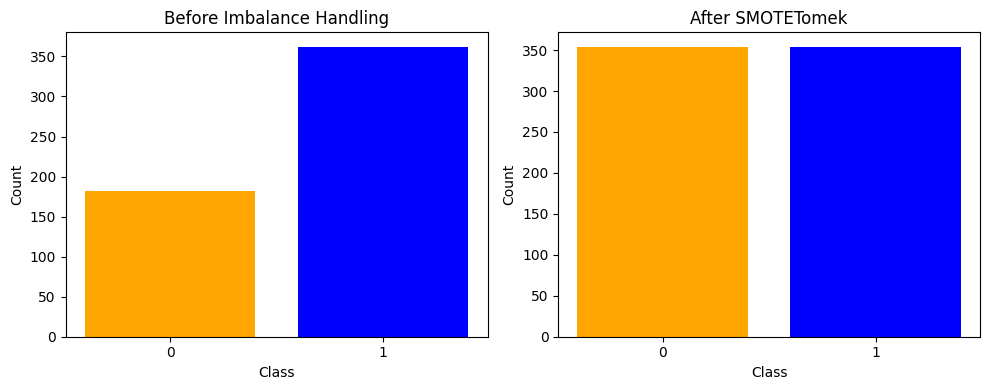

In [43]:
# Hitung distribusi sebelum dan sesudah
before = Counter(y_train)
after  = Counter(y_train_final)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# BEFORE
ax[0].bar(before.keys(), before.values(), color=['blue', 'orange'])
ax[0].set_title("Before Imbalance Handling")
ax[0].set_xticks([0, 1])
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Count")

# AFTER
ax[1].bar(after.keys(), after.values(), color=['blue', 'orange'])
ax[1].set_title("After SMOTETomek")
ax[1].set_xticks([0, 1])
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Training Logistic Regression + HPO (GridSearch)

Import Library untuk Model + GridSearch

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

Definisikan Model Logistic Regression

In [ ]:
log_reg = LogisticRegression(
    solver="liblinear",   
    max_iter=500
)

Siapkan Hyperparameter Grid

In [38]:
param_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1, 10, 100],
    "class_weight": [None, "balanced"]
}

Inisialisasi GridSearchCV

In [39]:
grid = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)


GridSearch (Training Model)

In [40]:
print("=== MEMULAI HPO Logistic Regression ===")

grid.fit(X_train_final, y_train_final)

print("\n=== HPO SELESAI ===")
print("Best Params :", grid.best_params_)
print("Best AUC CV :", grid.best_score_)


=== MEMULAI HPO Logistic Regression ===

=== HPO SELESAI ===
Best Params : {'C': 100, 'class_weight': None, 'penalty': 'l1'}
Best AUC CV : 0.9731991951710262


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Evaluasi Model di Test Set

In [41]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]


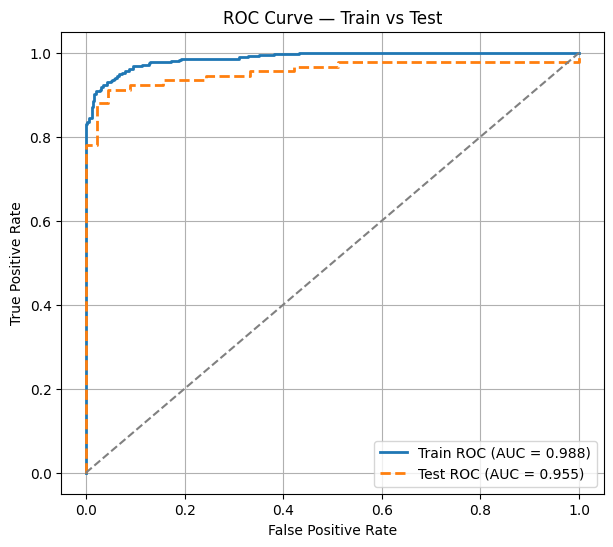

In [48]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# TRAIN
y_prob_train = best_model.predict_proba(X_train_final)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train_final, y_prob_train)
auc_train = auc(fpr_train, tpr_train)

# TEST
y_prob_test = best_model.predict_proba(X_test_scaled)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)
auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(7,6))

plt.plot(fpr_train, tpr_train, label=f"Train ROC (AUC = {auc_train:.3f})", linewidth=2)
plt.plot(fpr_test, tpr_test, label=f"Test ROC (AUC = {auc_test:.3f})", linewidth=2, linestyle="--")

plt.plot([0,1], [0,1], color='gray', linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Train vs Test")
plt.grid(True)
plt.legend()
plt.show()

Confusion Matrix

In [42]:
print("\n=== CONFUSION MATRIX ===")
print(confusion_matrix(y_test, y_pred))


=== CONFUSION MATRIX ===
[[44  1]
 [15 76]]


=== CONFUSION MATRIX ===
[[44  1]
 [15 76]]


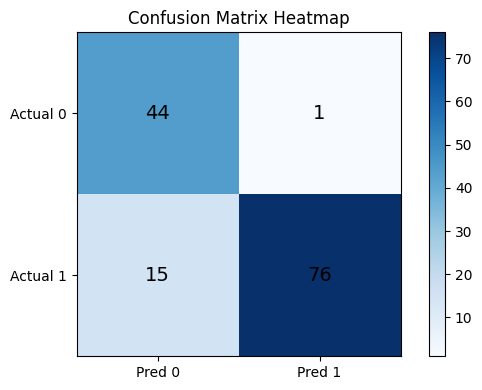

In [49]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Hitung confusion matrix dulu
cm = confusion_matrix(y_test, y_pred)

print("=== CONFUSION MATRIX ===")
print(cm)

# Plot heatmap
plt.figure(figsize=(6,4))

plt.imshow(cm, cmap="Blues")

# Tambahkan angka dalam kotak
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=14)

# Label sumbu
plt.xticks([0,1], ["Pred 0", "Pred 1"])
plt.yticks([0,1], ["Actual 0", "Actual 1"])

plt.title("Confusion Matrix Heatmap")
plt.colorbar()
plt.tight_layout()
plt.show()


Classification Report

In [43]:
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred))


=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        45
           1       0.99      0.84      0.90        91

    accuracy                           0.88       136
   macro avg       0.87      0.91      0.88       136
weighted avg       0.91      0.88      0.89       136



ROC-AUC Test

In [44]:
print("\n=== ROC-AUC (TEST SET) ===")
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)


=== ROC-AUC (TEST SET) ===
AUC: 0.9550671550671551


Cek Koefisien Model

In [50]:
feature_names = available_features   # atau X_train.columns jika masih ada

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coef": best_model.coef_[0]
}).sort_values("coef", ascending=False)

print("=== Koefisien Fitur Logistic Regression ===")
display(coef_df)


=== Koefisien Fitur Logistic Regression ===


,feature,coef
11,diameter_x_velocity,129.759792
12,diameter_x_impacts,54.993958
13,velocity_x_impacts,13.058074
9,Aphelion Distance (AU),3.293482
2,log_impacts,3.265260
26,peri_norm,2.942028
4,Orbit Axis (AU),2.878345
22,moid2,2.726682
20,velocity2,1.545462
24,incl_sin,0.095385
